<a href="https://colab.research.google.com/github/OhJin-Soo/data_analysis/blob/main/uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uber = pd.read_csv("/content/drive/MyDrive/data/uber_reviews_without_reviewid.csv")

In [13]:
uber.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,NaN,Good,5,0,4.556.10005,2024-12-18 17:17:19,NaN,NaN,4.556.10005
1,User_1,NaN,Nice,5,0,4.556.10005,2024-12-18 17:17:17,NaN,NaN,4.556.10005
2,User_2,NaN,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,NaN,NaN,4.532.10001
3,User_3,NaN,Good,4,0,4.556.10005,2024-12-18 17:08:27,NaN,NaN,4.556.10005
4,User_4,NaN,exllence,5,0,4.556.10005,2024-12-18 17:08:16,NaN,NaN,4.556.10005


In [14]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 937.6+ KB


In [7]:
uber.describe()

,userImage,score,thumbsUpCount
count,0.0,12000.000000,12000.000000
mean,NaN,3.925417,0.517000
std,NaN,1.658940,6.298268
min,NaN,1.000000,0.000000
25%,NaN,3.000000,0.000000
50%,NaN,5.000000,0.000000
75%,NaN,5.000000,0.000000
max,NaN,5.000000,239.000000


In [19]:
uber.drop(columns = ['userImage','replyContent','repliedAt'], inplace=True)
uber

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,User_0,Good,5,0,4.556.10005,2024-12-18 17:17:19,4.556.10005
1,User_1,Nice,5,0,4.556.10005,2024-12-18 17:17:17,4.556.10005
2,User_2,Very convenient,5,0,4.532.10001,2024-12-18 17:09:42,4.532.10001
3,User_3,Good,4,0,4.556.10005,2024-12-18 17:08:27,4.556.10005
4,User_4,exllence,5,0,4.556.10005,2024-12-18 17:08:16,4.556.10005
...,...,...,...,...,...,...,...
11995,User_11995,Excellent!!!,5,0,4.553.10000,2024-11-24 21:59:16,4.553.10000
11996,User_11996,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,2024-11-24 21:56:10,4.552.10000
11997,User_11997,Exceptional,5,0,4.552.10000,2024-11-24 21:52:21,4.552.10000
11998,User_11998,Good Service.,5,0,4.553.10000,2024-11-24 21:50:30,4.553.10000


In [20]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              12000 non-null  object
 1   content               12000 non-null  object
 2   score                 12000 non-null  int64 
 3   thumbsUpCount         12000 non-null  int64 
 4   reviewCreatedVersion  10260 non-null  object
 5   at                    12000 non-null  object
 6   appVersion            10260 non-null  object
dtypes: int64(2), object(5)
memory usage: 656.4+ KB


In [21]:
uber.dropna(inplace=True)
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10260 entries, 0 to 11998
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              10260 non-null  object
 1   content               10260 non-null  object
 2   score                 10260 non-null  int64 
 3   thumbsUpCount         10260 non-null  int64 
 4   reviewCreatedVersion  10260 non-null  object
 5   at                    10260 non-null  object
 6   appVersion            10260 non-null  object
dtypes: int64(2), object(5)
memory usage: 641.2+ KB


In [22]:
uber.describe()

,score,thumbsUpCount
count,10260.000000,10260.000000
mean,3.970175,0.602144
std,1.631666,6.807563
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,239.000000


In [27]:
num_ubercol = uber.select_dtypes(include=['number'])
num_ubercol.corr()

,score,thumbsUpCount
score,1.000000,-0.117309
thumbsUpCount,-0.117309,1.000000


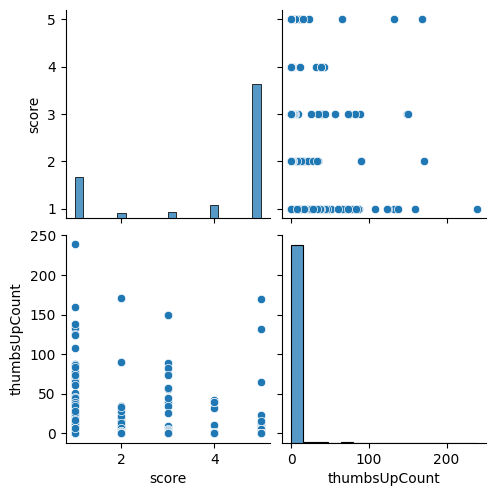

In [28]:
sns.pairplot(num_ubercol)

Correiation is not exist, So different stat proceed

In [39]:
appversion = uber["appVersion"].value_counts()
popular_appversion = appversion.iloc[:4]
popular_appversion

,count
appVersion,
4.554.10001,3187
4.555.10003,2327
4.556.10005,1699
4.553.10000,1667


In [38]:
x = popular_appversion.index
y = popular_appversion.values
print(x)
print(y)

Index(['4.554.10001', '4.555.10003', '4.556.10005', '4.553.10000'], dtype='object', name='appVersion')
[3187 2327 1699 1667]


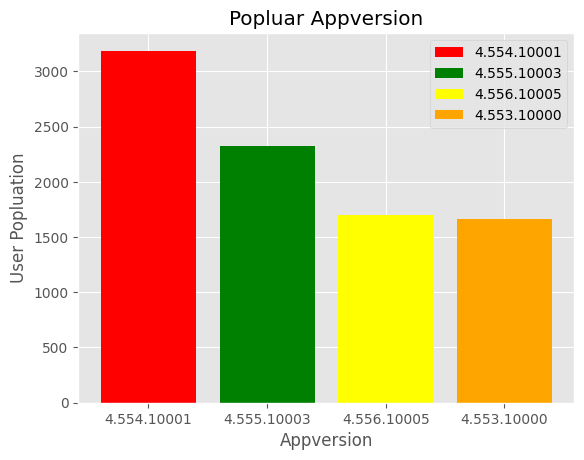

In [55]:
plt.style.use('ggplot')
colors = ['red','green','yellow','orange']
plt.title("Popluar Appversion")
plt.xlabel("Appversion")
plt.ylabel("User Popluation")
labels = ['4.554.10001', '4.555.10003', '4.556.10005', '4.553.10000']
plt.bar(x,y,color=colors,label=labels)
plt.legend()


In [64]:
reviewCreatedVersion = uber["reviewCreatedVersion"].value_counts()
popular_reviewCreatedVersion = reviewCreatedVersion.iloc[:4]
popular_reviewCreatedVersion

,count
reviewCreatedVersion,
4.554.10001,3187
4.555.10003,2327
4.556.10005,1699
4.553.10000,1667


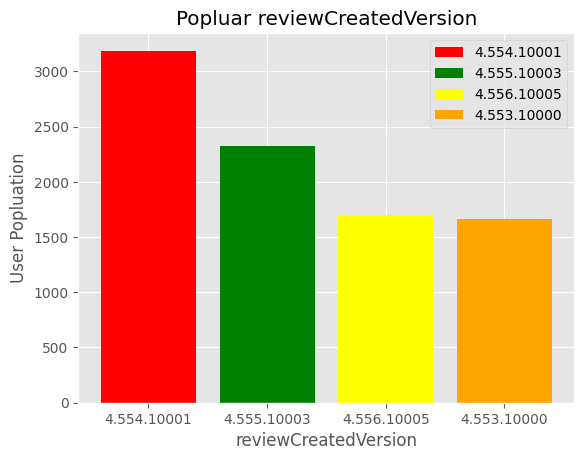

In [65]:
reviewCreatedVersion = uber["reviewCreatedVersion"].value_counts()
popular_reviewCreatedVersion = appversion.iloc[:4]
popular_reviewCreatedVersion

x = popular_appversion.index
y = popular_appversion.values

plt.style.use('ggplot')
colors = ['red','green','yellow','orange']
plt.title("Popluar reviewCreatedVersion")
plt.xlabel("reviewCreatedVersion")
plt.ylabel("User Popluation")
labels = ['4.554.10001', '4.555.10003', '4.556.10005', '4.553.10000']
plt.bar(x,y,color=colors,label=labels)
plt.legend()


In [59]:
score = uber["score"].value_counts()
score

,count
score,
5,6884
1,2117
4,693
3,293
2,273


In [61]:
x = score.index
y = score.values
print(x)
print(y)

Index([5, 1, 4, 3, 2], dtype='int64', name='score')
[6884 2117  693  293  273]


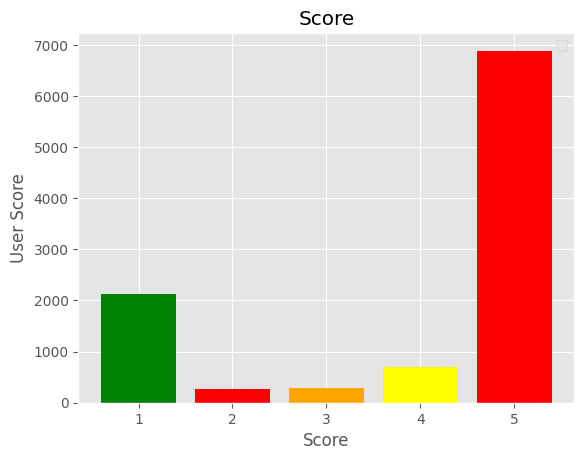

In [62]:
plt.style.use('ggplot')
colors = ['red','green','yellow','orange']
plt.title("Score")
plt.xlabel("Score")
plt.ylabel("User Score")
plt.bar(x,y,color=colors)
plt.legend()

I think this data can used text mining(Sentiment analysis), but i won't.